# **Convolutional Neural Networks**

In [1]:
# Imports from Video 10 - Image Preparation for Convulutional Neural Networks with TensorFlow's Keras API
# Source link: https://www.youtube.com/watch?v=_L2uYfVV48I&list=PLkUrsn8FkQFb5Gr_CY7HQErZRr6mPb-2q&index=11&t=222s

import numpy as np # linear algebra
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.1351.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.11355.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.6524.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.4713.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.10824.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.10215.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.1426.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.3492.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.3282.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.12358.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.8113.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.5699.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.8511.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog.12489.jpg
/kaggle/input/sample-dataset-1/dogs-vs-cats/valid/dog/dog

## **Data Preparation - Video11 (Image Preparation for Convolutional Neural Networks with TensorFlow's Keras API)**

The images included in the /kaggle/input/dogs-vs-cats directory are a random subset of the full cat and dog data set from the following Kaggle competition: https://www.kaggle.com/competitions/dogs-vs-cats/data

In [2]:
# Organize data into train, valid, test dirs (directories)

# Change the working directory to '/kaggle/working'
os.chdir('/kaggle/working')

# Define the source directory in the input path
source_directory = '/kaggle/input/sample-dataset-1/dogs-vs-cats'

if os.path.isdir('my_dataset') is False:
    # Copy the entire source directory to the working directory
    shutil.copytree(source_directory, 'my_dataset') 

# In separate notebook to lessen input data
# if os.path.isdir('train/dog') is False:
#     os.makedirs('train/dog')
#     os.makedirs('train/cat')
#     os.makedirs('valid/dog')
#     os.makerdirs('valid/cat')
#     os.makedirs('test/dog')
#     os.makedirs('test/cat')
    
    
#     for c in random.sample(glob.glob('cat*'), 500):
#         shutil.move(c, 'train/cat')
#     for c in random.sample(glob.glob('dog*'), 500):
#         shutil.move(c, 'train/dog')
#     for c in random.sample(glob.glob('cat*'), 100):
#         shutil.move(c, 'valid/cat')
#     for c in random.sample(glob.glob('dog*'), 100):
#         shutil.move(c, 'valid/dog')
#     for c in random.sample(glob.glob('cat*'), 50):
#         shutil.move(c, 'test/cat')
#     for c in random.sample(glob.glob('dog*'), 50):
#         shutil.move(c, 'test/dog')


In [3]:
train_path = '/kaggle/working/my_dataset/train'
valid_path = '/kaggle/working/my_dataset/valid'
test_path = '/kaggle/working/my_dataset/test'

In [4]:
print(os.path.isdir(train_path))
print(os.path.isdir(valid_path))
print(os.path.isdir(test_path))

True
True
True


In [5]:
# Create batches of data passed to Sequential Model
# Preprocessing images to same format to as images get passed to vgg16 model
# Provided classes for one-hot encoding
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [7]:
imgs, labels = next(train_batches)

In [8]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

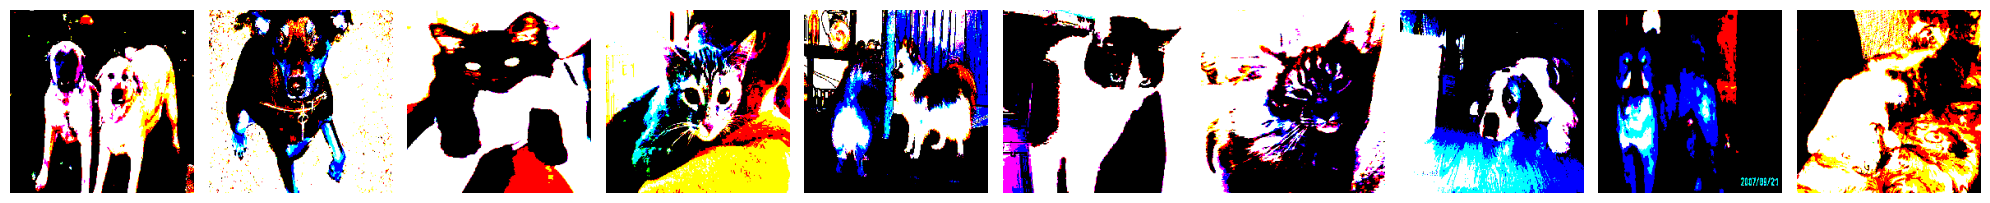

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [9]:
plotImages(imgs)
print(labels)

## **Build and train a CNN - Video12 (Build and Train a Convolutional Neural Network with TensorFlow's Keras API)**

In [10]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(units=2, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 12s - loss: 29.3390 - accuracy: 0.5450 - val_loss: 26.9623 - val_accuracy: 0.6100 - 12s/epoch - 119ms/step
Epoch 2/10
100/100 - 3s - loss: 9.5917 - accuracy: 0.7390 - val_loss: 11.2212 - val_accuracy: 0.6100 - 3s/epoch - 28ms/step
Epoch 3/10
100/100 - 3s - loss: 3.7560 - accuracy: 0.8290 - val_loss: 10.3042 - val_accuracy: 0.6350 - 3s/epoch - 29ms/step
Epoch 4/10
100/100 - 3s - loss: 1.8341 - accuracy: 0.8880 - val_loss: 9.7257 - val_accuracy: 0.6300 - 3s/epoch - 27ms/step
Epoch 5/10
100/100 - 3s - loss: 1.0449 - accuracy: 0.9180 - val_loss: 11.1106 - val_accuracy: 0.6150 - 3s/epoch - 27ms/step
Epoch 6/10
100/100 - 4s - loss: 0.8505 - accuracy: 0.9390 - val_loss: 12.0576 - val_accuracy: 0.6350 - 4s/epoch - 37ms/step
Epoch 7/10
100/100 - 3s - loss: 0.6656 - accuracy: 0.9420 - val_loss: 11.9569 - val_accuracy: 0.6400 - 3s/epoch - 28ms/step
Epoch 8/10
100/100 - 3s - loss: 0.3104 - accuracy: 0.9720 - val_loss: 11.3830 - val_accuracy: 0.6100 - 3s/epoch - 33ms/step
Epoch

## **Predict - Video14 (Convolutional Neural Network Predictions with TensorFlow's Keras API)**

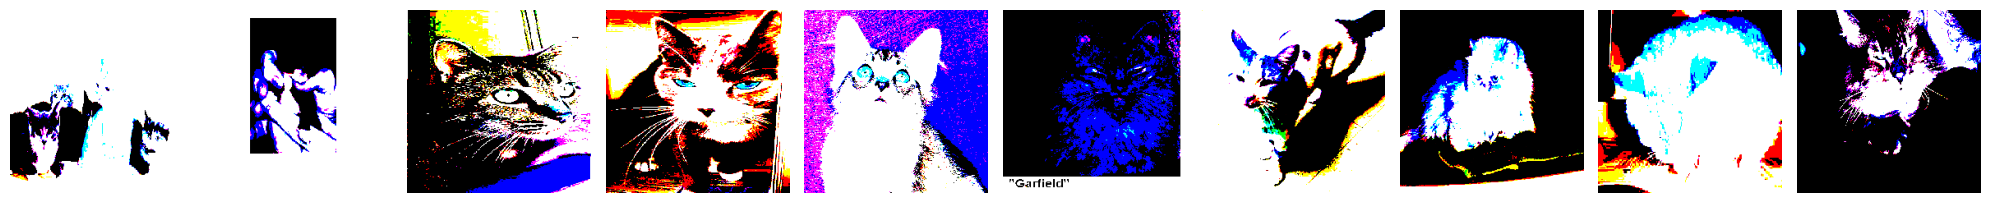

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [14]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [15]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
predictions = model.predict(x=test_batches, verbose=0)

In [17]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [18]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape [0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[32 18]
 [10 40]]


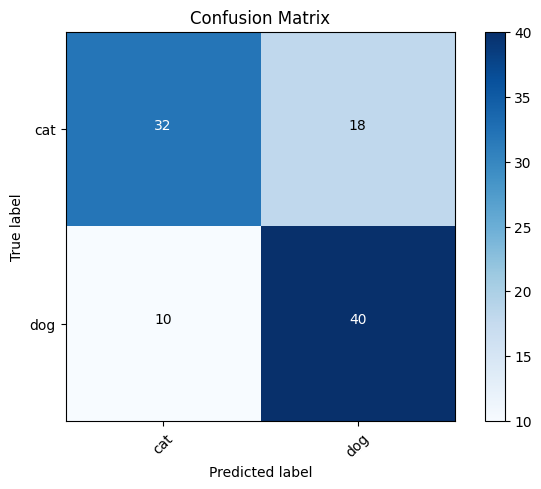

In [21]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## ** Build Fine-tuned VGG16 model - Video16 (Build a Fine-Tuned Neural Network with TensorFlow's Keras API)**

In [22]:
# Download model - Internet connection needed
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 2s 0us/step


In [23]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return{'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [25]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In [26]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [28]:
params = count_params(model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544

In [29]:
type(vgg16_model)

keras.engine.functional.Functional

In [30]:
for layer in model.layers:
    layer.trainable = False

In [31]:
model.add(Dense(units=2, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [33]:
params = count_params(model)
assert params['non_trainable_params'] == 134260544
assert params['trainable_params'] == 8194